# CPSC 4970 AI + ML: Module 1


In [7]:
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import IPython
from IPython.display import display
import sklearn
import mglearn

## Loading data sets

- scikit-learn datasets:
  <https://scikit-learn.org/stable/datasets.html#datasets>
- Seaborn datasets:
  <https://seaborn.pydata.org/generated/seaborn.load_dataset.html>
- Pandas functions for reading from files/urls:
  <https://pandas.pydata.org/docs/user_guide/io.html>
- UCI machine learning data repository:
  <https://archive.ics.uci.edu/ml/index.php>
- Kaggle:
  <https://kaggle.com>


In [8]:
print(sklearn.datasets)
db = sklearn.datasets.load_diabetes(as_frame=True)['frame']
#print(db)
pen = sns.load_dataset('penguins')
#print(type(pen))
vac = pd.read_csv('data/vaccinations.csv')
print(vac.info())

<module 'sklearn.datasets' from '/Users/shaffer/AIWithML/CPSC4970-AI/venv/lib/python3.10/site-packages/sklearn/datasets/__init__.py'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             32941 non-null  object 
 1   iso_code                             32941 non-null  object 
 2   date                                 32941 non-null  object 
 3   total_vaccinations                   19348 non-null  object 
 4   people_vaccinated                    18497 non-null  float64
 5   people_fully_vaccinated              15498 non-null  float64
 6   daily_vaccinations_raw               16340 non-null  float64
 7   daily_vaccinations                   32690 non-null  object 
 8   total_vaccinations_per_hundred       19347 non-null  float64
 9   people_vaccinated_per_hund

## Splitting training and testing data

[scikit-learn docs for train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [9]:
fake_data = np.array([1, 10, 2, 3, 15, 1, -1, -3, 18, 12, 22, 15]).reshape(4, 3)
display(fake_data)
train, test = sklearn.model_selection.train_test_split(db, test_size=0.33)
display(train)
display(test.head(5))

array([[ 1, 10,  2],
       [ 3, 15,  1],
       [-1, -3, 18],
       [12, 22, 15]])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
32,0.034443,0.050680,0.125287,0.028758,-0.053855,-0.012900,-0.102307,0.108111,0.000272,0.027917,341.0
356,-0.005515,0.050680,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028323,-0.075636,54.0
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641,48.0
171,-0.020045,-0.044642,-0.046085,-0.098627,-0.075870,-0.059873,-0.017629,-0.039493,-0.051404,-0.046641,74.0
133,-0.041840,0.050680,-0.053630,-0.040099,-0.084126,-0.071772,-0.002903,-0.039493,-0.072133,-0.030072,83.0
...,...,...,...,...,...,...,...,...,...,...,...
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
362,0.019913,0.050680,0.104809,0.070072,-0.035968,-0.026679,-0.024993,-0.002592,0.003709,0.040343,321.0
48,0.067136,0.050680,-0.041774,0.011544,0.002559,0.005889,0.041277,-0.039493,-0.059471,-0.021788,75.0
161,-0.045472,0.050680,0.063852,0.070072,0.133274,0.131461,-0.039719,0.108111,0.075741,0.085907,217.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
420,0.023546,-0.044642,-0.036385,0.000079,0.001183,0.034698,-0.043401,0.034309,-0.033246,0.061054,146.0
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333,262.0
292,0.009016,-0.044642,-0.022373,-0.032077,-0.049727,-0.068641,0.078093,-0.070859,-0.062917,-0.038357,84.0
386,0.019913,-0.044642,-0.040696,-0.015999,-0.008449,-0.017598,0.052322,-0.039493,-0.030748,0.003064,72.0
113,0.019913,0.050680,0.014272,0.063187,0.014942,0.020293,-0.047082,0.034309,0.046662,0.090049,297.0


## Separate the feature matrix and target vector

- [Pandas User Guide especially "10 minutes to pandas"](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)

In [10]:
X_train = train[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
display(X_train)
X_test = test[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
# could use "iloc"
y_train = train['target']
y_test = test['target']
display(y_train)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
32,0.034443,0.050680,0.125287,0.028758,-0.053855,-0.012900,-0.102307,0.108111,0.000272,0.027917
356,-0.005515,0.050680,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028323,-0.075636
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641
171,-0.020045,-0.044642,-0.046085,-0.098627,-0.075870,-0.059873,-0.017629,-0.039493,-0.051404,-0.046641
133,-0.041840,0.050680,-0.053630,-0.040099,-0.084126,-0.071772,-0.002903,-0.039493,-0.072133,-0.030072
...,...,...,...,...,...,...,...,...,...,...
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
362,0.019913,0.050680,0.104809,0.070072,-0.035968,-0.026679,-0.024993,-0.002592,0.003709,0.040343
48,0.067136,0.050680,-0.041774,0.011544,0.002559,0.005889,0.041277,-0.039493,-0.059471,-0.021788
161,-0.045472,0.050680,0.063852,0.070072,0.133274,0.131461,-0.039719,0.108111,0.075741,0.085907


32     341.0
356     54.0
436     48.0
171     74.0
133     83.0
       ...  
0      151.0
362    321.0
48      75.0
161    217.0
136     85.0
Name: target, Length: 296, dtype: float64

## Intro to data visualization

Tools:
- Use matplotlib directly:
 - [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
 - [reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
- Use pandas visualization tools: <https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html> -- not used in this course
- Use Seaborn:
 - <https://seaborn.pydata.org/>
 - <https://seaborn.pydata.org/tutorial.html> (tutorial)
 - <https://seaborn.pydata.org/tutorial/function_overview.html> (part of tutorial)
 - <https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial> (part of tutorial)
 - <https://seaborn.pydata.org/tutorial/axis_grids.html> (part of tutorial)

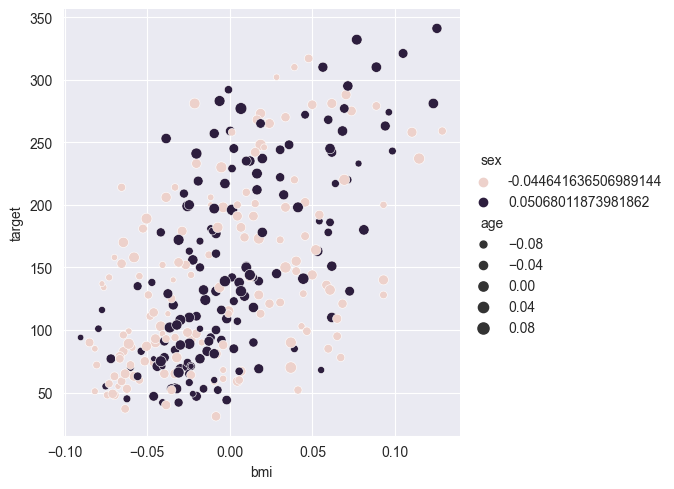

In [11]:
sns.relplot(x="bmi", y="target", hue='sex', size='age', data=train)

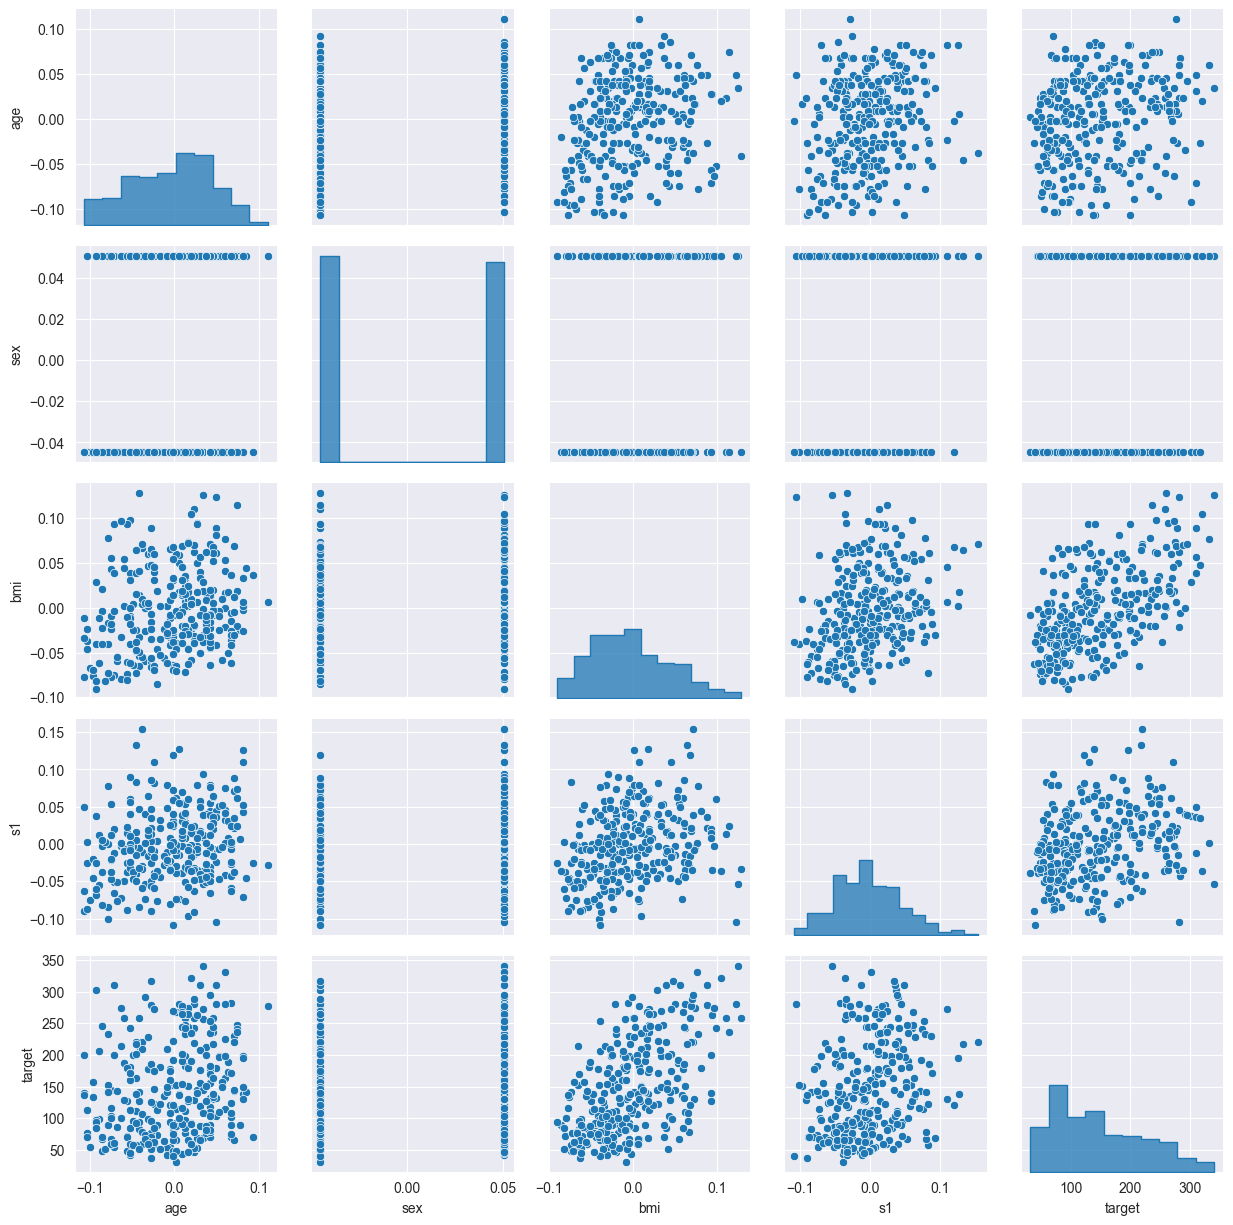

In [12]:
g = sns.PairGrid(train[['age', 'sex', 'bmi', 's1', 'target']])
g.map_diag(sns.histplot, element="step")
g.map_offdiag(sns.scatterplot)

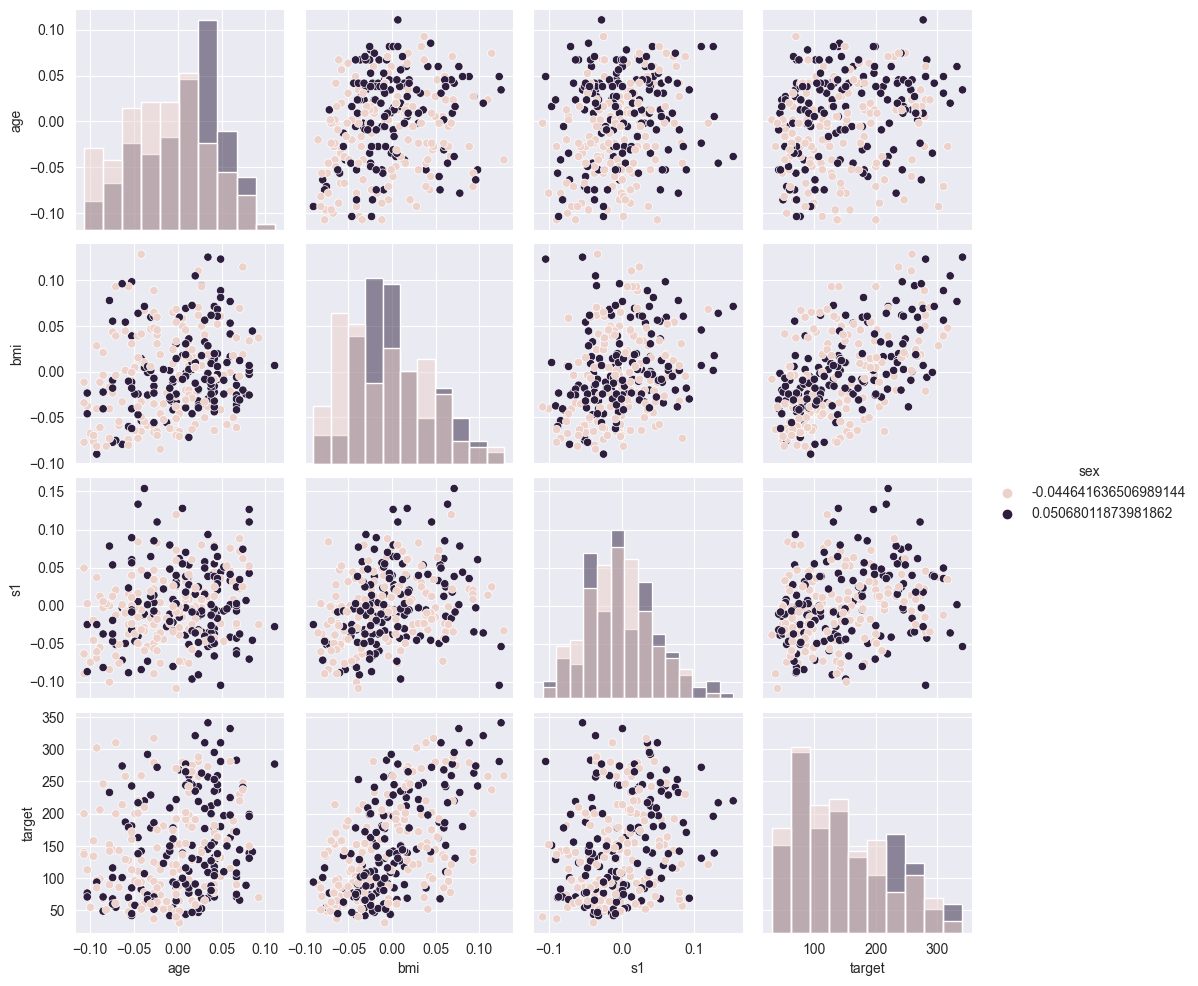

In [13]:
sns.pairplot(train[['age', 'sex', 'bmi', 's1', 'target']], hue='sex', diag_kind='hist')

## Univariate linear model

- Scikit-learn LinearRegression
    <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>
    and
    <https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares>

Santity check:

In [14]:
synth = pd.read_csv('data/synthetic_linear_1var.csv')
X = synth[['x']]
y = synth['y']
synth_lr = sklearn.linear_model.LinearRegression().fit(X, y)
print("intercept: ", synth_lr.intercept_)
print("coeff: ", synth_lr.coef_)

intercept:  -0.11363636363637397
coeff:  [5.20272727]


Regression of BMI vs target

intercept:  148.28087262077372
coeff:  [924.66858743]


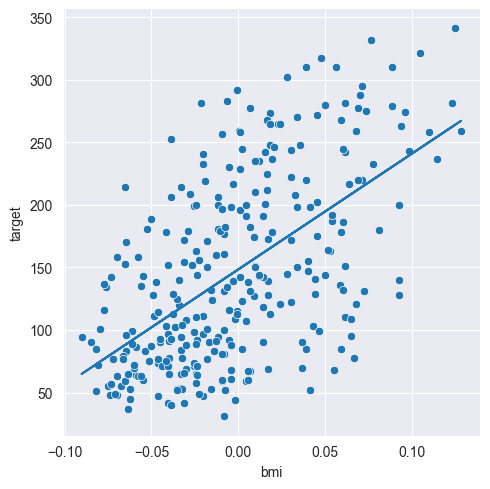

In [15]:
lr = sklearn.linear_model.LinearRegression().fit(X_train[['bmi']], y_train)
print("intercept: ", lr.intercept_)
print("coeff: ", lr.coef_)

sns.relplot(x='bmi', y='target', data=train)
p = lr.predict(X_train[['bmi']])
plt.plot(X_train[['bmi']], p)

## Metrics

- Scikit-learn's metrics module:
  <https://scikit-learn.org/stable/modules/model_evaluation.html> (especially "regression metrics" section)
  and
  <https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics>

First our synthetic data

In [16]:
p = synth_lr.predict(X)
mse = sklearn.metrics.mean_squared_error(synth['y'], p)
print("MSE: ", mse)
r2 = sklearn.metrics.r2_score(synth['y'], p)
print("R2: ", r2)

MSE:  2.510834710743799
R2:  0.990809352702975


Now for diabetes data set

In [17]:
p = lr.predict(X_train[['bmi']])
mse = sklearn.metrics.mean_squared_error(y_train, p)
print("MSE: ", mse)
r2 = sklearn.metrics.r2_score(y_train, p)
print("R2: ", r2)
print((max(y_train)-min(y_train))**2/len(y_train))

MSE:  3774.7680392816073
R2:  0.33184388434716017
324.6621621621622
